* Disciplina: Coleta e Armazenamento de Dados
* Técnica: Web Scraping
* Linguagem: Python

* Aluno: Rodrigo da Costa Aglinskas
* Orientador: Fabio Silva Lopes

* Data: 29/10/2021

## Desafio:
#### Implemente o tutorial disponível no artigo para coletar dados sobre basketball da NBA.

* Modifique a apresentação dos resultados utilizando um gráfico de linhas.
* Amplie a pesquisa para incluir dados até o ano de 2020.

## Web Scraping Dados Esportivos NBA

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [4]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [5]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [6]:
df.reset_index(inplace=True)

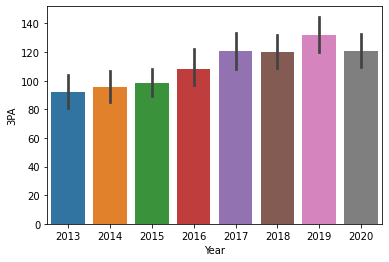

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(x="Year", y="3PA", data=df)

In [9]:
df.tail()

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
3986,672,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,0.437,205,568,0.361,341,681,0.501,0.519,481,559,0.860,32,223,255,560,65,8,289,104,1778,2020
3987,673,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,0.524,18,75,0.240,233,404,0.577,0.543,122,179,0.682,160,251,411,88,40,25,75,140,642,2020
3988,674,527,Tyler Zeller,C,30,SAS,2,0,4,1,4,0.250,0,0,NaN,1,4,0.250,0.250,0,0,NaN,3,1,4,0,0,0,0,0,2,2020
3989,675,528,Ante Žižić,C,23,CLE,22,0,221,41,72,0.569,0,0,NaN,41,72,0.569,0.569,14,19,0.737,18,48,66,6,7,5,10,27,96,2020
3990,676,529,Ivica Zubac,C,22,LAC,72,70,1326,236,385,0.613,0,2,0.000,236,383,0.616,0.613,124,166,0.747,197,346,543,82,16,66,61,168,596,2020


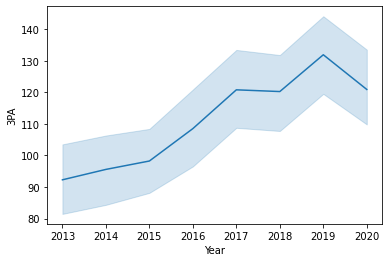

In [10]:
sns.lineplot(data=df, x="Year", y="3PA")
plt.show()

In [11]:
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player','3P','Year', '3PA']].head()

,Player,3P,Year,3PA
1543,Stephen Curry,402,2016,886
3112,James Harden,378,2019,1028
3029,Stephen Curry,354,2019,810
2000,Stephen Curry,324,2017,789
3678,James Harden,299,2020,843


In [12]:
grouped_df = df.groupby('Player', as_index=False).sum()
sorted_df = grouped_df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player','3P','3PA']].head()

,Player,3P,3PA
450,James Harden,2004,5530
959,Stephen Curry,1862,4281
205,Damian Lillard,1558,4210
650,Kyle Korver,1503,3385
652,Kyle Lowry,1194,3232
